In [203]:
%matplotlib inline 
from __future__ import division
from pylab import *
import skimage as ski
from skimage import data, io, filters, exposure
from skimage.filters import rank
from skimage import img_as_float, img_as_ubyte
from skimage.morphology import disk
import skimage.morphology as mp
from skimage import util
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
from skimage.filters.edges import convolve
from matplotlib import pylab as plt
import numpy as np
import pandas as pd
from numpy import array
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from ipywidgets import *
from ipykernel.pylab.backend_inline import flush_figures

import cv2

from skimage import measure

def skrajne(x, y): #przyjmuje na wejsciu wspolrzedne konturu (x[] i y[])
    lewy = 600
    prawy = 0
    gorny = 800
    dolny = 0
    for elem in x:
        if elem < lewy:
            lewy = elem
        if elem > prawy:
            prawy = elem
    for elem in y:
        if elem < gorny:
            gorny = elem
        if elem > dolny:
            dolny = elem
    return (lewy, prawy, gorny, dolny)
    

def mse(imageA, imageB):

    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def rozmiar_obszaru(wielokat): #przyjmuje na wejsciu obraz
            #(tablice 2x2 z jedynkami tam gdzie jest cos zamalowane)
    lewy = 600
    prawy = 0
    gorny = 800
    dolny = 0
    for i in range(len(wielokat)):
        for j in range(len(wielokat[i])):
            if wielokat[i][j] == 1:
                if lewy > i:
                    lewy = i
                if prawy < i:
                    prawy = i
                if gorny > j:
                    gorny = j
                if gorny < j:
                    dolny = j
#     print(prawy, lewy, dolny, gorny)     
    return (prawy - lewy, dolny - gorny)
    
def wspolczynnik_a_prostej(A, B):
    return (A[1] - B[1])/(A[0] - B[0])

def kopiuj(x):
    y = [row[:] for row in x]
    return y

from skimage.measure import (moments, moments_central, moments_normalized,
                             moments_hu)

table = []
norm2 = lambda x: -np.sign(x)*np.log10(np.abs(x))

def getHu(img):
    m = moments(img)
    cr = m[0, 1] / m[0, 0]
    cc = m[1, 0] / m[0, 0]
    mu = moments_central(img, cr, cc)
    mn = moments_normalized(mu)
    hu = moments_hu(mn)
    l = [norm2(f) for f in hu]
    return l

def getMin(sum_product):
    indices  = (0, 1, np.Inf)
    temp_sum = np.Inf
    for i in sum_product:
        if i[2] < temp_sum:
            temp_sum = i[2]
            indices = i
    return indices


def getCopies(df):
    x, y = 0, 1
    temp = []
    for n in range(len(df)):
        for j in range(len(df)):
            if not(n == j): 
                sum_product = 0
                for i in range(len(df.iloc[j])):
                    if i == 5:
                        sum_product += (abs((df.iloc[j, i]) - abs(df.iloc[n,i]))**2)/(df.iloc[j, i])**2
                    else:
                        sum_product += (((df.iloc[j, i]) - (df.iloc[n,i]))**2)/(df.iloc[j, i])**2
                temp.append((n, j, sum_product))
    copy = getMin(temp)
    return copy

def getdiff(df):
    x, y = 0, 1
    temp = []
    for n in range(len(df)):
        for j in range(len(df)):
            if not(n == j): 
                sum_product = 0
                for i in range(len(df.iloc[j])):
                    if i == 6:
#                         sum_product += 0
                        sum_product += ((abs(df.iloc[j, i]) - abs(df.iloc[n,i]))**2)
                    else:
                        sum_product += ((df.iloc[j, i] - df.iloc[n,i])**2)
                temp.append((n, j, sum_product))
    
    return temp

import numpy as np
import matplotlib.pyplot as plt

from skimage import measure

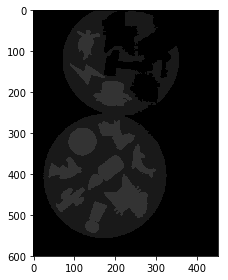

In [491]:

nazwa = "obraz23.jpg"

img = data.imread(nazwa)
img = rgb2gray(img)

img = img_as_float(img)
perc = 0.6
MIN = np.percentile(img, perc)
MAX = np.percentile(img, 100-perc)
#Percentyl – kwantyl rzędu k/100, gdzie k=1, …   , 99.
#Intuicyjnie mówiąc, percentyl jest wielkością, poniżej której padają wartości zadanego procentu próbek.

norm = (img - MIN) / (MAX - MIN)
norm[norm[:,:] > 1] = 1
norm[norm[:,:] < 0] = 0



# norm[norm[:,:] > 0.5] = 1
# norm[norm[:,:] < 0.5] = 0

r = norm
r = img_as_float(r)
gamma = 1
r = r**gamma

r = mp.erosion(r)
# Find contours at a constant value of 0.8
kopia = np.zeros(shape(img), dtype=np.uint8)
contours = measure.find_contours(r, 0.83)

# nowe
warstwy = np.zeros(shape(img), dtype=np.float32)

for n, contour in enumerate(contours):
    if shape(contour)[0] > 200:
        x = contour[:, 0]
        y = contour[:, 1]
        from skimage.draw import polygon
        rr, cc = polygon(contour[:, 0], contour[:, 1])
        warstwy2 = np.zeros(shape(img), dtype=np.float32)
        warstwy2[rr, cc] = 0.1
        warstwy += warstwy2

io.imshow(warstwy)

if np.mean(r) > 0.8:
    prog_jasnosc = 0.09 #tlo biale
else:
    prog_jasnosc = 0.19 #tlo kolorowe

for x in range(len(warstwy)):
    for y in range(len(warstwy[0])):
        if warstwy[x][y] >prog_jasnosc:
            warstwy[x][y] = 0.5
        else:
            warstwy[x][y] = 0.0

    
contours = measure.find_contours(warstwy, 0.49)
#koniec nowe


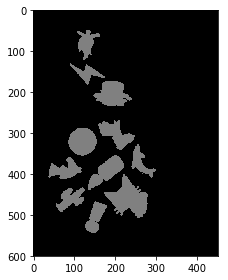

In [492]:
io.imshow(warstwy)

D:\programy\Anaconda-DataScience\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


,0,0,1,2,3,4,5,6,7,8,9
0,0,2.887324,6.174680,11.100767,11.315008,22.524162,14.402578,-23.640535,185.764147,178.160183,178.863244
1,1,2.746572,6.789832,9.391931,10.477809,-20.494871,13.884983,-20.663445,132.819974,102.892319,130.346848
2,3,2.611313,5.615410,8.891061,9.976770,19.703608,13.950409,-19.475927,137.966033,164.351902,173.922554
3,4,2.703986,6.173010,8.687051,9.991260,19.967105,13.455720,19.342306,166.011577,100.050165,104.367696
4,13,2.487616,5.201783,7.792728,8.234364,16.248016,10.839687,-17.902824,180.464881,124.240118,92.816073
5,14,2.584375,5.329406,8.412961,8.710797,17.272677,11.375503,19.886977,176.203160,152.862302,148.737020
6,16,2.744210,5.986415,8.879093,10.080518,19.963669,-14.111031,-19.597169,192.024336,160.858407,95.459440
7,21,2.955787,9.841096,12.215212,13.182476,-26.843262,-18.190525,25.883923,119.883943,155.393641,174.791415
8,30,2.450938,5.021382,8.152284,9.046477,-17.745441,-11.619315,17.863033,118.132990,169.553608,194.573196
9,35,2.715028,5.866426,9.693651,10.128122,20.045613,13.061354,-20.800760,133.242882,129.977358,135.779417


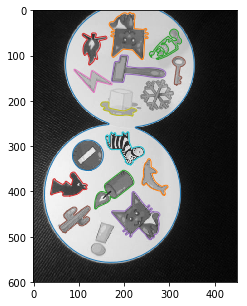

In [493]:
# UWAGA-  Kuba, jesli nie chcesz miec konturow z obrazka powyzej, tylko tak jak bylo, odkomentuj linijke ponizej

contours = measure.find_contours(r, 0.73)

fig, ax = plt.subplots(figsize=(5, 5))

hu_moments = []
n_ind = []

for n, contour in enumerate(contours):

#     if shape(contour)[0] > 200 and  n==0:
    if shape(contour)[0] > 200:
        x = contour[:, 0]
        y = contour[:, 1]
        punkty_skrajne = skrajne(x, y)
#         print(punkty_skrajne)
#         print(n)
        ax.plot(contour[:, 1], contour[:, 0], linewidth=1)
        from skimage.draw import polygon
        wielokat = np.zeros(shape(img), dtype=np.uint8)
        
        k = np.zeros(shape(img), dtype=np.float32)
        #k = np.float32(k)
        rr, cc = polygon(contour[:, 0], contour[:, 1])
        wielokat[rr, cc] = 1
        kopia[rr, cc] = 1
        
        for i in range(len(wielokat)):
            for j in range(len(wielokat[0])):
                    if wielokat[i][j] == 1:
                        k[i][j] = img[i][j]
                        #k[i][j] = 1
                    else:
                        k[i][j] = 0
#                         print(k[i][j])
        import skimage.measure as miarka
        k = k[int(punkty_skrajne[0]):int(punkty_skrajne[1]), int(punkty_skrajne[2]):int(punkty_skrajne[3])]
        kolorowe = data.imread(nazwa)
        kolorowe = kolorowe[int(punkty_skrajne[0]):int(punkty_skrajne[1]), int(punkty_skrajne[2]):int(punkty_skrajne[3])]
        wiel = wielokat[int(punkty_skrajne[0]):int(punkty_skrajne[1]), int(punkty_skrajne[2]):int(punkty_skrajne[3])]
        
        io.imsave("k.jpg", k, plugins = None)
        io.imsave("k_kolorowe.jpg", kolorowe, plugins = None)
        #io.imshow(k)
        # k to ten wyciety obrazek
        kol = io.imread("k_kolorowe.jpg")
        red = kolorowe[:,:, 0]
        green = kolorowe[:,:, 1]
        blue = kolorowe[:,:, 2]

        srednia_red = 0.0
        srednia_green = 0.0
        srednia_blue = 0.0
        licz = 0
        for i in range(len(kol)):
            for j in range(len(kol[0])):
                if wiel[i][j] == 1:
                    srednia_red += red[i][j]
                    srednia_green += green[i][j]
                    srednia_blue += blue[i][j]
                    licz += 1
        srednia_red /= licz
        srednia_green /= licz
        srednia_blue /= licz
        hu_moments.append( getHu(io.imread("k.jpg")) + [srednia_red, srednia_green, srednia_blue])
        n_ind.append(n)
        ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
        
        im2, contours, hierarchy = cv2.findContours(wielokat,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cnt = contours[0]

      
        

        
        #cv2.getHuMoments(momenty)
ax.axis('image')
# wyświetlanie wyników
df1 =  pd.DataFrame(n_ind)
frames = [df1, pd.DataFrame(hu_moments)]
result = pd.concat(frames, axis = 1)

display(result)
plt.show()

In [494]:
duplikaty = getCopies(pd.DataFrame(hu_moments))
# tu patrze jakie indeksy w hu_moments mają najbardziej podobne
print(duplikaty)
# a tu srawdzam jakie indeksty powyższe indeksy mają w naszej tabeli konturów (63 i 69)
result.iloc[:, 0]
result.columns = ["n", "M1", "M2","M3","M4","M5","M6", "M7", "R", "G", "B"]
display(result)


(1, 14, 0.011625829649793064)


,n,M1,M2,M3,M4,M5,M6,M7,R,G,B
0,0,2.887324,6.174680,11.100767,11.315008,22.524162,14.402578,-23.640535,185.764147,178.160183,178.863244
1,1,2.746572,6.789832,9.391931,10.477809,-20.494871,13.884983,-20.663445,132.819974,102.892319,130.346848
2,3,2.611313,5.615410,8.891061,9.976770,19.703608,13.950409,-19.475927,137.966033,164.351902,173.922554
3,4,2.703986,6.173010,8.687051,9.991260,19.967105,13.455720,19.342306,166.011577,100.050165,104.367696
4,13,2.487616,5.201783,7.792728,8.234364,16.248016,10.839687,-17.902824,180.464881,124.240118,92.816073
5,14,2.584375,5.329406,8.412961,8.710797,17.272677,11.375503,19.886977,176.203160,152.862302,148.737020
6,16,2.744210,5.986415,8.879093,10.080518,19.963669,-14.111031,-19.597169,192.024336,160.858407,95.459440
7,21,2.955787,9.841096,12.215212,13.182476,-26.843262,-18.190525,25.883923,119.883943,155.393641,174.791415
8,30,2.450938,5.021382,8.152284,9.046477,-17.745441,-11.619315,17.863033,118.132990,169.553608,194.573196
9,35,2.715028,5.866426,9.693651,10.128122,20.045613,13.061354,-20.800760,133.242882,129.977358,135.779417


2.95532964901
2.15752560289
1.84409834445
1.783690679


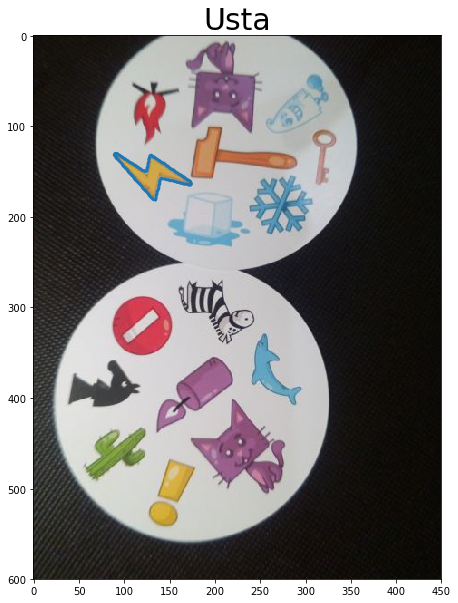

In [495]:
fig, ax = plt.subplots(figsize=(15, 10))
kolorowy = io.imread(nazwa)
ax.imshow(kolorowy, interpolation='nearest')
contours = measure.find_contours(warstwy, 0.49)


for n, contour in enumerate(contours):
#     if n == 99 or n== 96:
    if n == result.iloc[:, 0][duplikaty[0]] or n == result.iloc[:, 0][duplikaty[1]]:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=3)
        ax.set_title(porownajBaze(result.iloc[n,1:8]), size = 30)
        savefig("zdjecia/" + nazwa)
        


In [485]:
baza_obrazków = {"Butelka": [2.842330, 5.908643, 9.831452, 9.903460, 19.771887, 12.863248, 20.946219],
                "Samochod": [2.909374, 7.719943, 9.534100, 10.449567, -20.442104, -14.327201, 21.686462],
                "Smoczek": [2.728574, 7.089788, 9.044641, 10.033485, 19.926508, 13.730899, 19.619899],
                "Usta": [2.614013, 5.767939, 9.755560, 10.540907, 20.703777, 13.485861, -21.282077]}

def porownajBaze(hu):
    napis_tytul = "Znaleziono symbole"
    suma = np.Inf
    for (string,record) in baza_obrazków.items():
        sum_temp = 0
        napis_temp = ""
        for i in range(7):
            sum_temp += (abs(hu[i])-abs(record[i]))**2
        print(sum_temp)
        if (sum_temp < suma): 
            suma = sum_temp
            napis_tytul = string
    if suma < 2:
        return napis_tytul
    else: return "Znaleziono symbole"
porownajBaze(result.iloc[14, 1:8])
# baza_obrazków.items()

IndexError: single positional indexer is out-of-bounds

16


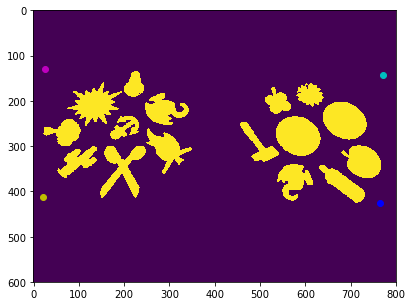

In [176]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(kopia, interpolation='nearest')

im2, contours, hierarchy = cv2.findContours(kopia, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
a = []
for i in range(len(contours)):
    for j in range(len(contours[i])):
        a.append(contours[i][j][0])
print(len(contours))
a = np.array(a)
cnt = a
rect = cv2.minAreaRect(cnt) #tego uzywam do znalezienia MAR, by wiedziec jak obroc
box = cv2.boxPoints(rect)
ax.plot(box[0][0], box[0][1], 'bo')
ax.plot(box[1][0], box[1][1], 'yo')
ax.plot(box[2][0], box[2][1], 'mo')
ax.plot(box[3][0], box[3][1], 'co')



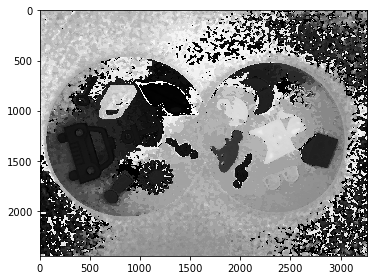

In [155]:

img = data.imread(nazwa)
kol = rgb2hsv(img)
hue = kol[:,:, 0]
sat = kol[:,:, 0]
img = rgb2gray(img)
io.imshow(hue)